
# Titanic Survival Prediction - Machine Learning Project

Welcome, TO All!  
This is Real World  Titanic Survival Prediction project.

**Goal:** Build a Machine Learning model that predicts whether a passenger survived or not based on features like gender, age, passenger class, etc.

Date: April 16, 2025


In [49]:

# Step 1: Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer



In [50]:

# Step 2: Load Dataset

df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:

# Step 3: Data Exploration

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [52]:

# Step 4: Data Cleaning

df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df.drop(columns=['deck', 'embark_town'], inplace=True)
df.dropna(inplace=True)
df.isnull().sum()


C:\Users\shara\AppData\Local\Temp\ipykernel_20380\2312232122.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\shara\AppData\Local\Temp\ipykernel_20380\2312232122.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

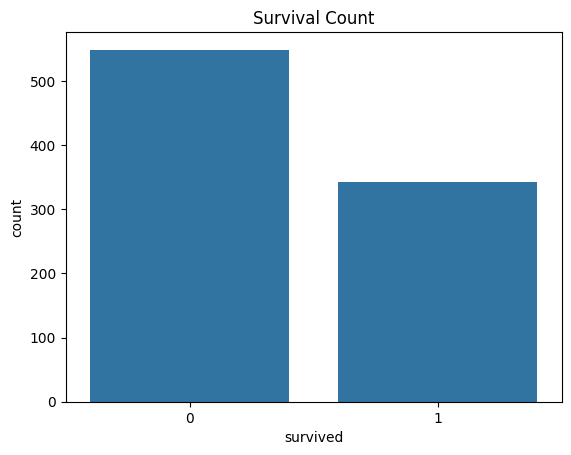

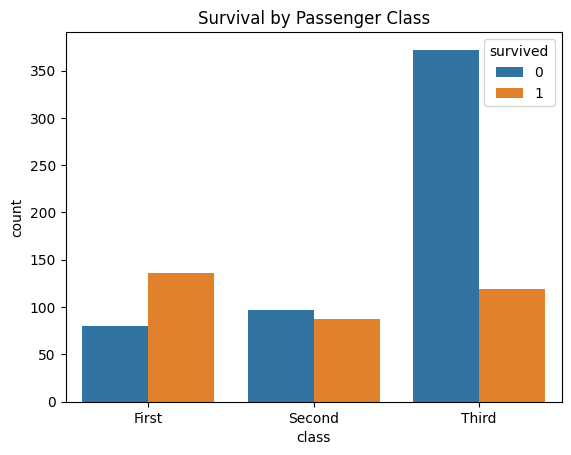

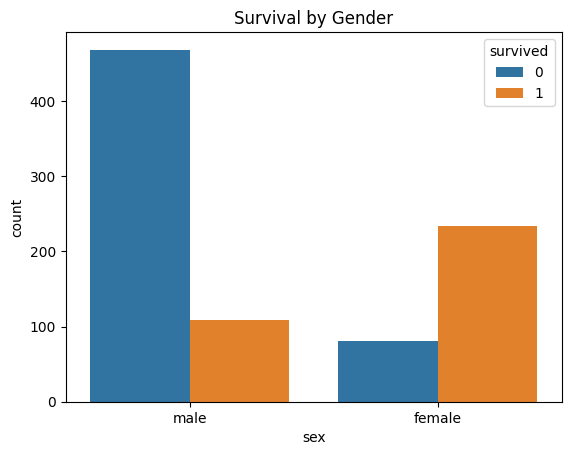

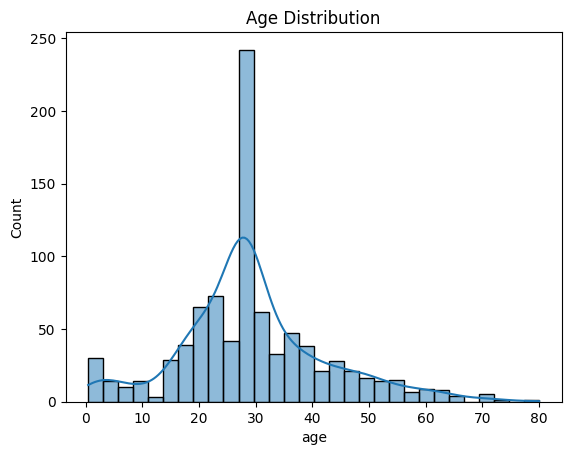

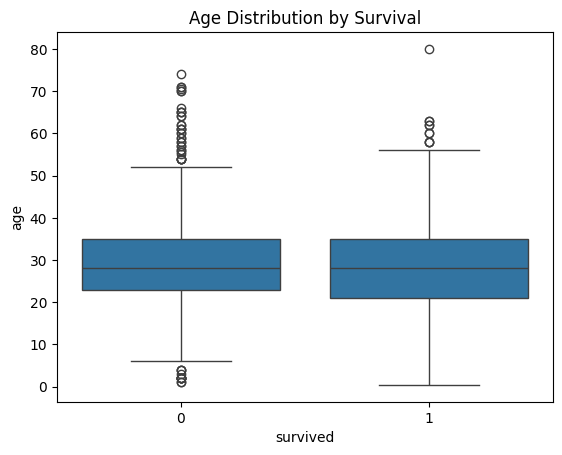

In [53]:

# Step 5: EDA - Visualizations

# Survival count
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()
# Class vs Survival
sns.countplot(x='class', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()
# Survival by gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()
sns.boxplot(x='survived', y='age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


In [54]:
# Step 6 : FILLING MISSING VALUES
# Fill missing values only if the column exists and has non-null values
if 'age' in df.columns:
    df['age'] = df['age'].fillna(df['age'].median())

if 'embarked' in df.columns and df['embarked'].dropna().shape[0] > 0:
    mode_val = df['embarked'].mode()
    if not mode_val.empty:
        df['embarked'] = df['embarked'].fillna(mode_val[0])

if 'fare' in df.columns:
    df['fare'] = df['fare'].fillna(df['fare'].median())
print("Embarked Column:", df['embarked'].unique())
print("Embarked Mode:", df['embarked'].mode())


Embarked Column: ['S' 'C' 'Q']
Embarked Mode: 0    S
Name: embarked, dtype: object


In [55]:
#STEP 7 : Encode 'sex' and 'embarked' if they exist
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


if 'sex' in df.columns:
    df['sex'] = label_encoder.fit_transform(df['sex'])

if 'embarked' in df.columns:
    df['embarked'] = label_encoder.fit_transform(df['embarked'])

df.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True, errors='ignore')
X = df.drop('survived', axis=1)  # Features
y = df['survived']               # Target


In [61]:
#STEP 8 : USING LOGISTIC REGRESSION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# STEP 9 : CLEANING DUMMIES USING LOGISTIC REGRESSION( X_TRAIN,Y_TRAIN)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns so they match
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

model = LogisticRegression(max_iter=200)
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [64]:
# STEP 10 : DATA PREPROCESSING
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le


In [67]:
print(X_train.dtypes)


pclass           int64
sex              int64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked         int64
class         category
who              int64
adult_male        bool
alive            int64
alone             bool
dtype: object


In [68]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the train and test columns (some categories might be missing in test)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [72]:
# STEP 11 : EVALUTION OF FINALL MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_encoded, y_train)

# Predict on test set
y_pred = model.predict(X_test_encoded)

# Evaluate
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179


Confusion Matrix:
 [[105   0]
 [  0  74]]


In [74]:
# FOR CLASSIFICATION USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

y_pred_rf = rf_model.predict(X_test_encoded)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0


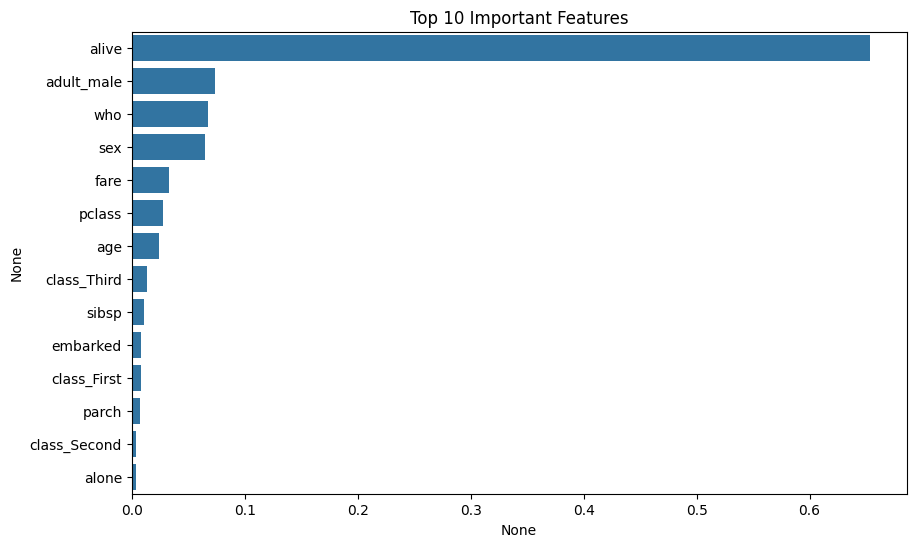

In [79]:
# FINALLY DATA VISUALIZED ( RANDOM TREE MODEL)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance from random forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_encoded.columns)
top_features = feature_importances.sort_values(ascending=False).head(100)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Important Features")
plt.show()
